# Assignment
- Philip Paquette
- Stéphanie Larocque

In [0]:
!pip install -q matplotlib
!pip install -q scipy
!pip install -q numpy
!pip install -q sklearn
!pip install -q gym

import random
import gym
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KDTree
from scipy.stats import multivariate_normal

In [0]:
def get_q_value(state, action, memory_buffer, trees, k):
    """ Returns the q-value of the (state, action) by querying the memory buffer """
    # Action not yet in memory buffer
    if not trees[action]:
        return 0.
      
    # Applying kernel method
    distance, indices = trees[action].query([state], k=k)
    sum_kernel = 0.
    weighted_q_values = 0.
    for indice in indices[0]:
        mem_state, mem_target = memory_buffer[action][indice]
        kernel = multivariate_normal.pdf(state, mean=mem_state)
        sum_kernel += kernel
        weighted_q_values += kernel * mem_target

    # Finding nearest neighbours and sampling their values
    return weighted_q_values / sum_kernel

def kernel_based_learning(env_name, nb_episodes=100, start_epsilon=0.45, epsilon=0.10, gamma=1.):
    """ Implements kernel-based reinforcement learning """
    env = gym.make(env_name)
    memory_buffer = {action: [] for action in range(env.action_space.n)}
    cum_ep_rewards = []
    trajectory_ix = -1
    k = 50

    # Running a trajectory
    while trajectory_ix < nb_episodes:
        trajectory_ix += 1
        transitions = []
        done = False
        state = env.reset()
        cum_episode_rew = 0.
        
        # Building trees
        trees = {}
        for action in memory_buffer:
            if len(memory_buffer[action]) < k:
                trees[action] = []
            else:
                trees[action] = KDTree([stored_memory[0] for stored_memory in memory_buffer[action]], leaf_size=k // 2)

        # Running until end of episode
        while not done:
            prob_random = start_epsilon if trajectory_ix < 50 else epsilon
            
            # Sampling an action
            if random.random() < prob_random:
                action = random.randrange(0, env.action_space.n)
            else:
                q_values = {action: get_q_value(state, action, memory_buffer, trees, k) for action in memory_buffer}
                max_q_value = max(q_values[action] for action in q_values)
                best_actions = [action for action in q_values if q_values[action] == max_q_value]
                action = random.choice(best_actions)

            # Stepping
            next_state, reward, done, _ = env.step(action)
            transitions += [(state, action, reward, next_state)]
            state = next_state
            cum_episode_rew += reward

        # Displaying progress
        if (trajectory_ix + 1) % 10 == 0:
            print('. %d / %d' % (trajectory_ix + 1, nb_episodes))
        else:
            print('.', end='')
        cum_ep_rewards += [cum_episode_rew]

        # Updating memory buffer
        cum_reward = 0.
        for state, action, reward, next_state in reversed(transitions):
            cum_reward = gamma * cum_reward + reward
            memory_buffer[action] += [(state, cum_reward)]

    # Plotting final graph
    plt.plot([np.mean(cum_ep_rewards[ix - 25: ix]) for ix in range(25, len(cum_ep_rewards))])
    #plt.show()

# Env 1 : CartPole-v0
- CartPole-v0 is a classic RL environment. See here : https://github.com/openai/gym/wiki/CartPole-v0 for more details. The reward received is the number of steps before the pole falls to the ground, with a maximum of 200 time steps. The goal here is thus to obtain 200. 
- To obtain smooth curves, each point is the average reward for the 25 past trajectories; otherwise it would oscillate too much to get relevant curves. 
- Each line represent the agent average reward curve through 150 episodes. As we can see below, the average reward becomes between 160 and 180 for each experiment.

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
.......... 10 / 150
.......... 20 / 150
.......... 30 / 150
.......... 40 / 150
.......... 50 / 150
.......... 60 / 150
.......... 70 / 150
.......... 80 / 150
.......... 90 / 150
.......... 100 / 150
.......... 110 / 150
.......... 120 / 150
.......... 130 / 150
.......... 140 / 150
.......... 150 / 150
.WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
.......... 10 / 150
.......... 20 / 150
.......... 30 / 150
.......... 40 / 150
.......... 50 / 150
.......... 60 / 150
.......... 70 / 150
.......... 80 / 150
.......... 90 / 150
.......... 100 / 150
......

.... 110 / 150
.......... 120 / 150
.......... 130 / 150
.......... 140 / 150
.......... 150 / 150
.WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
.......... 10 / 150
.......... 20 / 150
.......... 30 / 150
.......... 40 / 150
.......... 50 / 150
.......... 60 / 150
.......... 70 / 150
.......... 80 / 150
.......... 90 / 150
.......... 100 / 150
.......... 110 / 150
.......... 120 / 150
.......... 130 / 150
.......... 140 / 150
.......... 150 / 150
.WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
.......... 10 / 150
.......... 20 / 150
.......... 30 / 150
.......... 40 / 150
.......... 50 / 150
.......... 60 / 150
.......... 70 / 150
....

...... 80 / 150
.......... 90 / 150
.......... 100 / 150
.......... 110 / 150
.......... 120 / 150
.......... 130 / 150
.......... 140 / 150
.......... 150 / 150
.WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
.......... 10 / 150
.......... 20 / 150
.......... 30 / 150
.......... 40 / 150
.......... 50 / 150
.......... 60 / 150
.......... 70 / 150
.......... 80 / 150
.......... 90 / 150
.......... 100 / 150
.......... 110 / 150
.......... 120 / 150
.......... 130 / 150
.......... 140 / 150
.......... 150 / 150
.

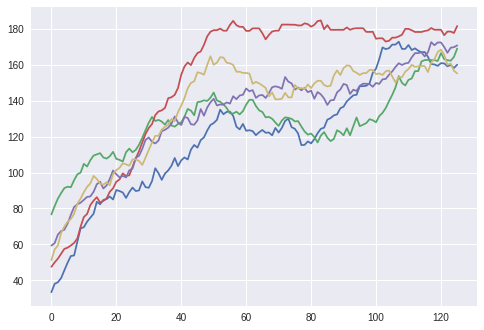

In [6]:
for i in range(5):
    kernel_based_learning('CartPole-v0', start_epsilon=0.35, epsilon=0.025, nb_episodes=150)
plt.show()

# Env 2 : Acrobot-v1
- Acrobot-v1 is also a classic RL environment. The reward received is -(number of steps before end of stick touches the goal height). The goal here is thus to obtain the lowest number of steps before achieving the goal, and thus maximizing -(number of steps). 
- To obtain smooth curves, each point is the average reward for the 25 past trajectories; otherwise it would oscillate too much to get relevant curves. 
- Each line represent the agent average reward curve through 125 episodes.
- As we can see below, the average reward really depends on each trajectory. Sometimes, the agent can't learn at all (stays at -500, the maximum number of steps), while other agents learn how to do it in approximately 150-250 steps instead. Since the action selection is stochastic with an high epsilon, each agent behavior can be really different.

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
.......... 10 / 125
.......... 20 / 125
.......... 30 / 125
.......... 40 / 125
.......... 50 / 125
.......... 60 / 125
.......... 70 / 125
.......... 80 / 125
.......... 90 / 125
.......... 100 / 125
.......... 110 / 125
.......... 120 / 125
......WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
.......... 10 / 125
.......... 20 / 125
.......... 30 / 125
.......... 40 / 125
.......... 50 / 125
.......... 60 / 125
.......... 70 / 125
.......... 80 / 125
.......... 90 / 125
.......... 100 / 125
.......... 110 / 125
.......... 120 / 125
..

....WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
.......... 10 / 125
.......... 20 / 125
.......... 30 / 125
.......... 40 / 125
.......... 50 / 125
.......... 60 / 125
.......... 70 / 125
.......... 80 / 125
.......... 90 / 125
.......... 100 / 125
.......... 110 / 125
.......... 120 / 125
......WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
.......... 10 / 125
.......... 20 / 125
.......... 30 / 125
.......... 40 / 125
.......... 50 / 125
.......... 60 / 125
.......... 70 / 125
.......... 80 / 125
.......... 90 / 125
.......... 100 / 125
.......... 110 / 125
.......... 120 / 125


......WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
.......... 10 / 125
.......... 20 / 125
.......... 30 / 125
.......... 40 / 125
.......... 50 / 125
.......... 60 / 125
.......... 70 / 125
.......... 80 / 125
.......... 90 / 125
.......... 100 / 125
.......... 110 / 125
.......... 120 / 125
......

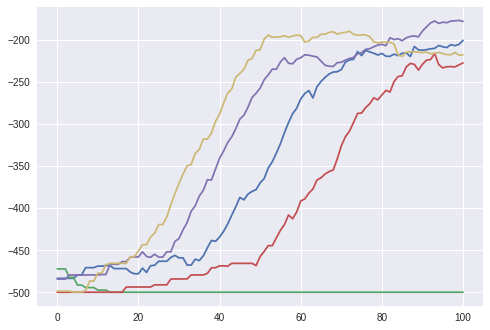

In [4]:
for i in range(5):
  kernel_based_learning('Acrobot-v1', start_epsilon=0.45, epsilon=0.2, nb_episodes=125)
plt.show()

# Improvements
- Weight the k-neighbors by some decaying parameter when the reward was received a long time ago, since it may not be relevant anymore (with the change in the policy). Otherwise, the agent can get stuck with some really bad approximation for a long time.
- We tried using a decaying epsilon for the acrobot environment, but it didn't work out particularly better. Instead, we used a large "star-epsilon" for the 50 first episodes and then use another epsilon for the remaining episodes.